In [7]:
import spacy
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load('en_core_web_sm')

In [8]:
df1 = pd.read_csv('../csv/Fake.csv')
df2 = pd.read_csv('../csv/True.csv')

df1['target'] = 0
df2['target'] = 1

df1 = df1.sample(2000, random_state=2023)
df2 = df2.sample(2000, random_state=2023)

df3 = pd.concat([df1, df2])
df3.drop(['subject', 'date', 'title'],axis='columns', inplace=True)
df3['target'].value_counts()

target
0    2000
1    2000
Name: count, dtype: int64

In [9]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue

        filtered_tokens.append(token.lemma_)

    return ' '.join(filtered_tokens)

In [10]:
df3['preprocessed_text'] = df3['text'].apply(preprocess)
df3.sample(5)

,text,target,preprocessed_text
17864,WASHINGTON (Reuters) - A diplomatic dispute be...,1,WASHINGTON Reuters diplomatic dispute Turkey U...
3895,Paul Ryan just gave another one of his notorio...,0,Paul Ryan give notoriously lukewarm endorsemen...
17538,BISHKEK (Reuters) - Kyrgyzstan votes in a pres...,1,BISHKEK Reuters Kyrgyzstan vote presidential e...
12691,"GOMA, Democratic Republic of Congo (Reuters) -...",1,GOMA Democratic Republic Congo Reuters suspect...
15131,COX S BAZAR/YANGON (Reuters) - They came in bo...,1,COX S BAZAR YANGON Reuters come boat flimsy ra...


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df3['preprocessed_text'], df3['target'], train_size=0.8, random_state=0)

In [16]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),
    ('knn', (KNeighborsClassifier(n_neighbors=10, metric='euclidean')))  
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.95      0.70       407
           1       0.80      0.19      0.31       393

    accuracy                           0.58       800
   macro avg       0.67      0.57      0.50       800
weighted avg       0.67      0.58      0.51       800



In [17]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),
    ('knn', (KNeighborsClassifier(n_neighbors=10, metric='cosine')))  
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       407
           1       0.81      0.96      0.88       393

    accuracy                           0.87       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.88      0.87      0.87       800



In [18]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),
    ('naive_bayes', (MultinomialNB(alpha=0.75)))  
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       407
           1       0.91      0.96      0.94       393

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [21]:
clf = Pipeline([
    ('vectorizer_n_grams', CountVectorizer(ngram_range = (1, 3))),
    ('random_forest', (RandomForestClassifier(n_estimators=50)))  
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       407
           1       0.95      0.97      0.96       393

    accuracy                           0.96       800
   macro avg       0.96      0.96      0.96       800
weighted avg       0.96      0.96      0.96       800



Text(95.72222222222221, 0.5, 'True')

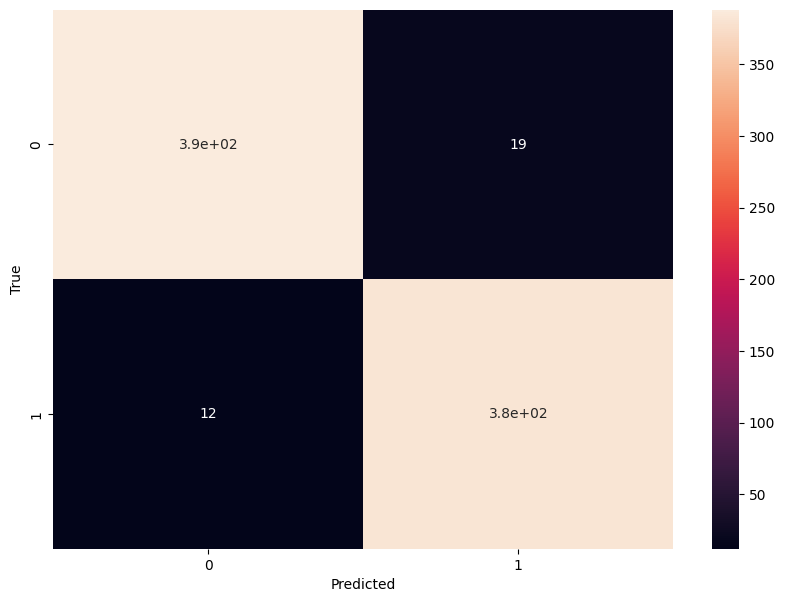

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")